In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import ast
import time
import os

In [2]:
v_df = pd.read_csv('MorthDataSets/Completed/TR_Accident_Vehicle.csv')
a_df = pd.read_csv('MorthDataSets/Completed/TBL_TR_Accident_Casualties.csv')

In [57]:

print v_df.shape
v_df.dropna(inplace=True)
v_df.drop_duplicates(inplace=True)
print v_df.shape
v_df.describe()


(410365, 10)
(233984, 10)


,Unit_ID,Crime_No,Vehicle_Owner_ID,UserID,Modified_Unit_ID,Sync_Id,Sync_Id_Old
count,233984.000000,2.339840e+05,2.339840e+05,2.339840e+05,233984.0,233984.0,233984.0
mean,1187.454377,2.016105e+09,2.016750e+09,1.029485e+08,0.0,-1.0,-1.0
std,602.771835,1.462900e+06,1.322442e+06,7.808712e+07,0.0,0.0,0.0
min,57.000000,2.014000e+09,2.014000e+09,4.500000e+01,0.0,-1.0,-1.0
25%,727.000000,2.015000e+09,2.016000e+09,4.500000e+07,0.0,-1.0,-1.0
50%,1206.000000,2.016000e+09,2.017001e+09,1.046000e+08,0.0,-1.0,-1.0
75%,1761.000000,2.017000e+09,2.018000e+09,1.503000e+08,0.0,-1.0,-1.0
max,2245.000000,2.019000e+09,2.019007e+09,1.869000e+09,0.0,-1.0,-1.0


In [58]:
v_df.columns

Index([u'Unit_ID', u'Registration_Number', u'Crime_No', u'Vehicle_Owner_ID',
       u'UserID', u'Modified_Unit_ID', u'Action_Flag', u'Sync_Id',
       u'Sync_Id_Old', u'DEDT'],
      dtype='object')

In [59]:
v_df.drop(['Action_Flag','Sync_Id','Sync_Id_Old','UserID'], axis=1, inplace=True)

In [60]:
v_df['Time'] = v_df['DEDT'].apply(lambda x : str((x[-5:])))

In [61]:
v_df['Date'] = v_df['DEDT'].apply(lambda x : str(x[:-5]))

In [62]:
v_df.sort_values('Date', axis=0, ascending=True, inplace=True, na_position='last')

In [63]:
v_df.drop(['Modified_Unit_ID'], inplace=True, axis=1)

In [64]:
v_df['Time'] = v_df['Time'].apply(lambda x : x[:2])

In [3]:
print a_df.isna().sum()
# a_df.dropna(inplace=True)
print a_df.shape
a_df.drop_duplicates(inplace=True)

Person_ID                   0
Crime_No                    0
Unit_ID                     0
Registration_Number       248
Casualty_Type               0
Injury_Type                 0
Injury_Description     822232
SeatBelt                    0
Helmet                      0
Passenger_Position          0
Hit_by                      0
Padestrian_Caused           0
Padestrian_Action           0
Padestrian_Location         0
Research_Code          813433
Head_Injury                 0
RegistrationValue           0
Injury_Details             44
Accident_Cause             18
Negligence_Details         12
UserID                      0
Person_No                   0
IsGov_Vehicle          822232
Modified_Unit_ID            0
Action_Flag                 0
Sync_Id                     0
Sync_Id_Old                 0
DEDT                        0
Hospital_Name          465746
dtype: int64
(822232, 29)


In [4]:
def get_unique(col, df=a_df):
    return list(df[col].unique())

In [5]:
def get_map(col, arr, df=a_df):
    return df[col].apply(lambda x: arr.index(x))

In [6]:
seat = get_unique('SeatBelt')
helm = get_unique('Helmet')
inj = get_unique('Injury_Type')

In [7]:
a_df['SeatBelt'] = get_map('SeatBelt', seat)

In [8]:
a_df['Helmet'] = get_map('Helmet', helm)
a_df['Injury_Type'] = get_map('Injury_Type', inj)

In [9]:
casualty = get_unique('Casualty_Type')
a_df['Casualty_Type'] = get_map('Casualty_Type', casualty)

In [10]:
pass_pos = get_unique('Passenger_Position')
a_df['Passenger_Position'] = get_map('Passenger_Position', pass_pos)

In [11]:
a_df.drop(['Injury_Description','UserID','IsGov_Vehicle','Modified_Unit_ID','Sync_Id','Sync_Id_Old'], axis=1, inplace=True)

In [12]:
hit = get_unique('Hit_by')
a_df['Hit_by'] = get_map('Hit_by', hit)

In [13]:
ped_loc = get_unique('Padestrian_Location')
a_df['Padestrian_Location'] = get_map('Padestrian_Location', ped_loc)

In [14]:
ped_act = get_unique('Padestrian_Action')
a_df['Padestrian_Action'] = get_map('Padestrian_Action', ped_act)

In [15]:
a_df.describe()

,Person_ID,Crime_No,Unit_ID,Casualty_Type,Injury_Type,SeatBelt,Helmet,Passenger_Position,Hit_by,Padestrian_Caused,Padestrian_Action,Padestrian_Location,Head_Injury,RegistrationValue,Person_No
count,2.518080e+05,2.518080e+05,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,251808.000000,2.518080e+05,2.518080e+05
mean,2.016717e+09,2.016002e+09,1151.717757,1.038954,0.780825,0.826316,1.168930,1.623880,1.245195,0.087745,0.466443,0.475215,0.041281,2.015769e+09,2.016017e+09
std,1.299479e+06,1.443596e+06,595.081551,0.917803,0.766115,0.684956,0.883402,1.481783,1.257265,0.523818,1.268221,1.317043,0.198941,4.235225e+07,1.447392e+06
min,2.014000e+09,2.014000e+09,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2.014000e+09
25%,2.016000e+09,2.015000e+09,608.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016000e+09,2.015000e+09
50%,2.017001e+09,2.016000e+09,1167.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.017000e+09,2.016000e+09
75%,2.017007e+09,2.017000e+09,1674.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.017005e+09,2.017001e+09
max,2.019010e+09,2.019000e+09,2245.000000,3.000000,4.000000,3.000000,4.000000,9.000000,9.000000,4.000000,10.000000,10.000000,1.000000,2.019007e+09,2.019002e+09


In [ ]:
sns.pairplot(a_df)

In [16]:
a_df.corr()

,Person_ID,Crime_No,Unit_ID,Casualty_Type,Injury_Type,SeatBelt,Helmet,Passenger_Position,Hit_by,Padestrian_Caused,Padestrian_Action,Padestrian_Location,Head_Injury,RegistrationValue,Person_No
Person_ID,1.000000,0.757620,0.038798,-0.018097,0.020149,0.000314,0.023788,0.037813,-0.023675,-0.025056,-0.012675,-0.012254,0.031550,-0.006383,0.759279
Crime_No,0.757620,1.000000,0.080934,-0.020588,-0.003146,0.007358,0.032525,0.028583,-0.032109,-0.003648,0.000479,0.002400,0.036807,-0.005071,0.994801
Unit_ID,0.038798,0.080934,1.000000,-0.051994,-0.048241,-0.012861,0.015542,-0.005082,-0.015944,0.033167,0.046827,0.056789,-0.001708,0.001031,0.081302
Casualty_Type,-0.018097,-0.020588,-0.051994,1.000000,-0.025117,0.287048,-0.216450,-0.476580,0.122740,-0.007143,-0.015603,-0.015295,-0.035995,-0.001968,-0.016754
Injury_Type,0.020149,-0.003146,-0.048241,-0.025117,1.000000,-0.007656,-0.025471,-0.000906,0.081434,-0.013907,-0.017980,-0.017203,0.139384,-0.009275,-0.004123
SeatBelt,0.000314,0.007358,-0.012861,0.287048,-0.007656,1.000000,-0.039338,-0.085140,0.046358,0.042409,0.093298,0.091542,-0.009692,-0.003180,0.008242
Helmet,0.023788,0.032525,0.015542,-0.216450,-0.025471,-0.039338,1.000000,0.214886,-0.141769,-0.031964,-0.070304,-0.068951,0.045781,0.000305,0.031211
Passenger_Position,0.037813,0.028583,-0.005082,-0.476580,-0.000906,-0.085140,0.214886,1.000000,-0.048614,-0.070523,-0.154818,-0.151865,0.010815,0.007204,0.028120
Hit_by,-0.023675,-0.032109,-0.015944,0.122740,0.081434,0.046358,-0.141769,-0.048614,1.000000,-0.042480,-0.083120,-0.086005,0.005576,0.003713,-0.028853
Padestrian_Caused,-0.025056,-0.003648,0.033167,-0.007143,-0.013907,0.042409,-0.031964,-0.070523,-0.042480,1.000000,0.351793,0.334551,0.044659,-0.017444,-0.004844


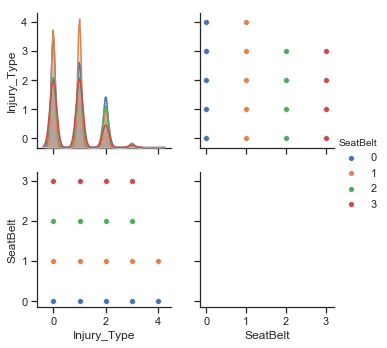

In [27]:
sns.pairplot(copy, vars=['Injury_Type','SeatBelt'], hue='SeatBelt')
plt.savefig('Injury vs Seatbelt.png')

In [23]:
plt.savefig('corr_plots.png')

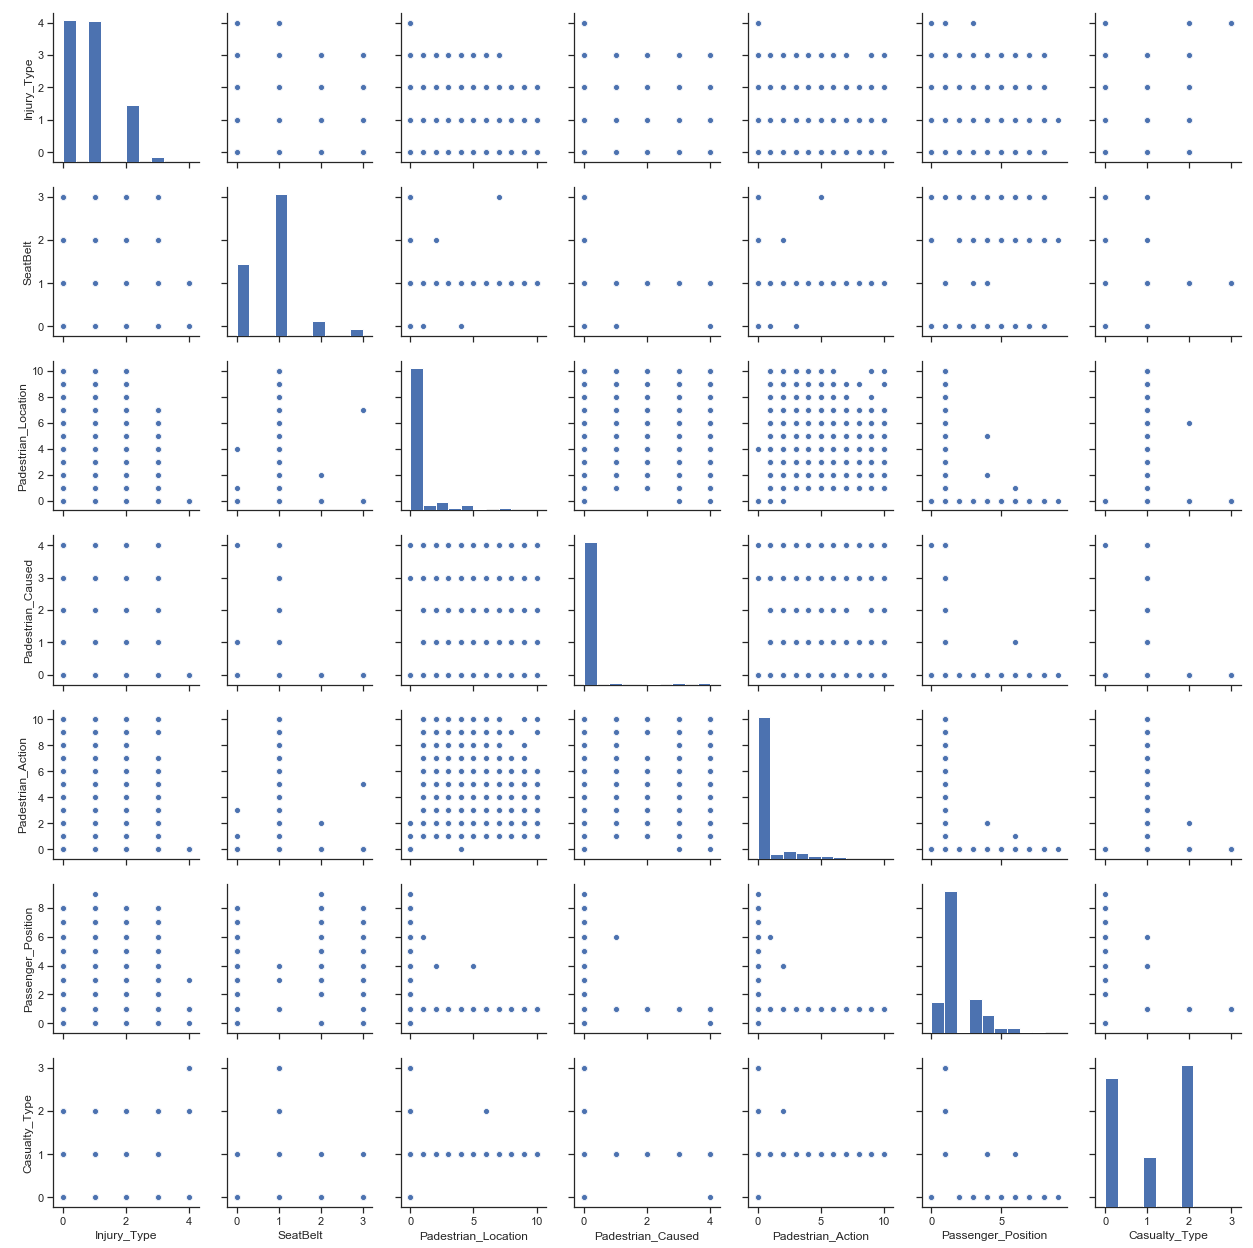

In [21]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(copy, vars=['Injury_Type','SeatBelt','Padestrian_Location','Padestrian_Caused','Padestrian_Action','Passenger_Position','Casualty_Type'])

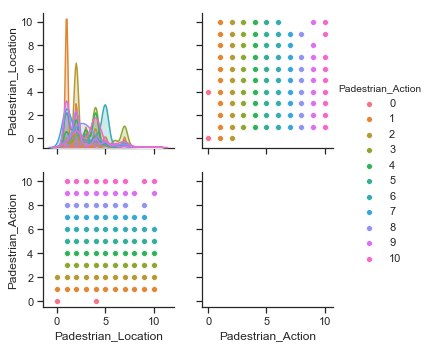

In [28]:
sns.pairplot(copy, vars=['Padestrian_Location','Padestrian_Action'], hue='Padestrian_Action')
plt.savefig('Padestrian loc vs Padestrian action.png')

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


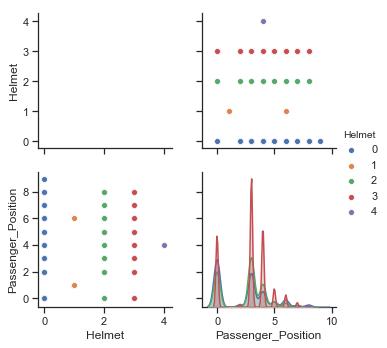

In [29]:
sns.pairplot(copy, vars=['Helmet','Passenger_Position'], hue='Helmet')
plt.savefig('Helmet vs Passenger pos.png')

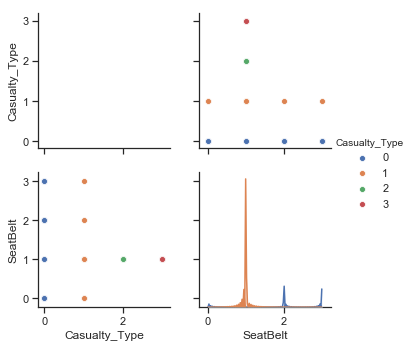

In [30]:
sns.pairplot(copy, vars=['Casualty_Type','SeatBelt'], hue='Casualty_Type')
plt.savefig('Casualty type vs Seatbelt.png')

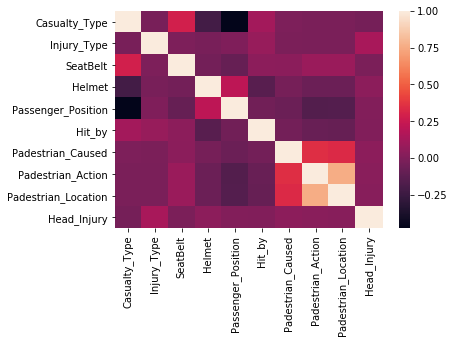

In [17]:
copy = a_df
copy.drop(['Person_ID','Crime_No','Unit_ID','Person_No','RegistrationValue'],axis=1, inplace=True)
sns.heatmap(copy.corr())

In [32]:
a_df.drop(['Research_Code'],inplace=True, axis=1)

In [36]:
a_df['Action_Flag'].unique()

array(['N'], dtype=object)

In [41]:
# a_df.drop(['Action_Flag'], axis=1, inplace=True)
a_df['Time'] = a_df['DEDT'].apply(lambda x : x[:-5])
a_df['Date'] = a_df['DEDT'].apply(lambda x : x[-5:])

In [43]:
a_df.drop(['DEDT'],inplace=True, axis=1)

In [46]:
a_df.shape

(251808, 17)

In [119]:
a_df.head(5)

,Registration_Number,Casualty_Type,Injury_Type,SeatBelt,Helmet,Passenger_Position,Hit_by,Padestrian_Caused,Padestrian_Action,Padestrian_Location,Head_Injury,Injury_Details,Accident_Cause,Negligence_Details,Hospital_Name,Time,Date
0,KA36Y4092,0,0,0,0,0,0,0,0,0,0,&nbsp;,&nbsp;,&nbsp;,empty,5/27/2014,12:13
2,KA15S0161,1,0,1,1,1,0,0,1,1,1,&nbsp;,&nbsp;,&nbsp;,Sub Division Govt Hospital Sagar,8/3/2014,19:47
3,KA29-TA3763,2,1,1,1,1,1,0,0,0,0,&nbsp;,&nbsp;,&nbsp;,KUMARESHWAR HPT BGK,1/26/2014,10:21
4,KA-14-X-7253,0,1,0,0,0,0,0,0,0,0,&nbsp;,&nbsp;,&nbsp;,empty,2/14/2014,13:01
5,KA32C0883,0,0,0,0,2,2,0,0,0,0,&nbsp;,ಅತಿವೇಗ ಹಾಗೂ ನಿಷ್ಕಾಳಜೀತನದಿಂದ ಚಲಾಯಿಸಿಕೊಂಡು.,&nbsp;,empty,8/16/2014,12:09


In [124]:
def basic_analysis(a_df=a_df):
    
    head_injury, helmet = 0,0
    for item in a_df['Head_Injury']:
        if item!=0:
            head_injury +=1
    for item in a_df['Helmet']:
        if item!=0:
            helmet+=1
    print "Head injury, 2 wheelers :",float(head_injury)*100/float(helmet),"%"

    sev, injury = 0,0
    minor, med = 0,0
    for item in a_df['Injury_Type']:
        if item==4:
            sev+=1
        elif item==3:
            med+=1
        elif item==2:
            minor+=1
        elif item!=0:
            injury +=1
    print "Severe injuries :{}%".format(float(sev)*100/float(injury))
    print "Moderate injuries {}%".format(float(med)*100/float(injury))
    print "Minor injuries :{}%".format(float(minor)*100/float(injury))
    print "Head injury of all injuries : {}%".format(float(head_injury)*100/float(injury))

    
    hosp,req = 0,0
    a_df['Hospital_Name']= a_df['Hospital_Name'].fillna('empty')
    
    for item in a_df['Hospital_Name']:
        if item!='empty':
            hosp+=1
        req+=1
        
    print "On average, {}% rushed to hospital on accident".format(float(hosp)*100/float(req))

In [125]:
basic_analysis()

Head injury, 2 wheelers : 5.06208911614 %
Severe injuries :0.0145966933624%
Moderate injuries 3.4788785847%
Minor injuries :40.4182439205%
Head injury of all injuries : 10.1155085001%
On average, 42.5868121744% rushed to hospital on accident


In [126]:
a_df.to_csv('processed_df_accident_data.csv')